# Finance Data Project 

In this data project, I performed exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice my visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
I focused on bank stocks and saw how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

### The Imports

In [3]:
pip install pandas-datareader

     -------------------------------------- 109.5/109.5 kB 6.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install yfinance

     ---------------------------------------- 65.3/65.3 kB 3.4 MB/s eta 0:00:00
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.28.1
    Uninstalling requests-2.28.1:
      Successfully uninstalled requests-2.28.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.27 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.27 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.27 requires requests==2.28.1, but you have requests 2.31.0 which is incompatible.


In [19]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
yf.pdr_override()
%matplotlib inline

## Data

I got the stock data by using pandas datareader from the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [20]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [22]:
# Bank of America
BAC = data.get_data_yahoo("BAC", start, end)

# CitiGroup
C = data.get_data_yahoo("C", start, end)

# Goldman Sachs
GS = data.get_data_yahoo("GS", start, end)

# JPMorgan Chase
JPM = data.get_data_yahoo("JPM", start, end)

# Morgan Stanley
MS = data.get_data_yahoo("MS", start, end)

# Wells Fargo
WFC = data.get_data_yahoo("WFC", start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [23]:
# Could also do this for a Panel Object
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'], start, end)

[*********************100%%**********************]  6 of 6 completed


** I created a list of the ticker symbols (as strings) in alphabetical order. **

In [24]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** I used pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. I also set the keys argument equal to the tickers list. **

In [25]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

** I set the column name levels.**

In [26]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** I checked the head of the bank_stocks dataframe.**

In [27]:
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  32.695660  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  32.348438  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  32.390102  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  32.341480  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  32.362320  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  33.995911  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  34.019234  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  34.112514  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  34.147499  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  34.508980  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  19.542271  11016400  
2006-01-04   31.530001  19.315601  10870000  
2006-01-05   31.495001  19.294161  10158000  
2006-01-06   31.680000  19.407499   8403800  
2006-01-09   31.674999  19.404440   5619600  

[5 rows x 36 columns]

# EDA

** What is the max Close price for each bank's stock throughout the time period?**

In [28]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

** I created a new empty DataFrame called returns. This dataframe contains the returns for each bank's stock. Returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [29]:
returns = pd.DataFrame()

** I used pandas pct_change() method on the Close column to create a column representing the return value. I also created a for loop that goes and for each Bank Stock Ticker and created the returns column and set it as a column in the returns DataFrame.**

In [30]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


** I created a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

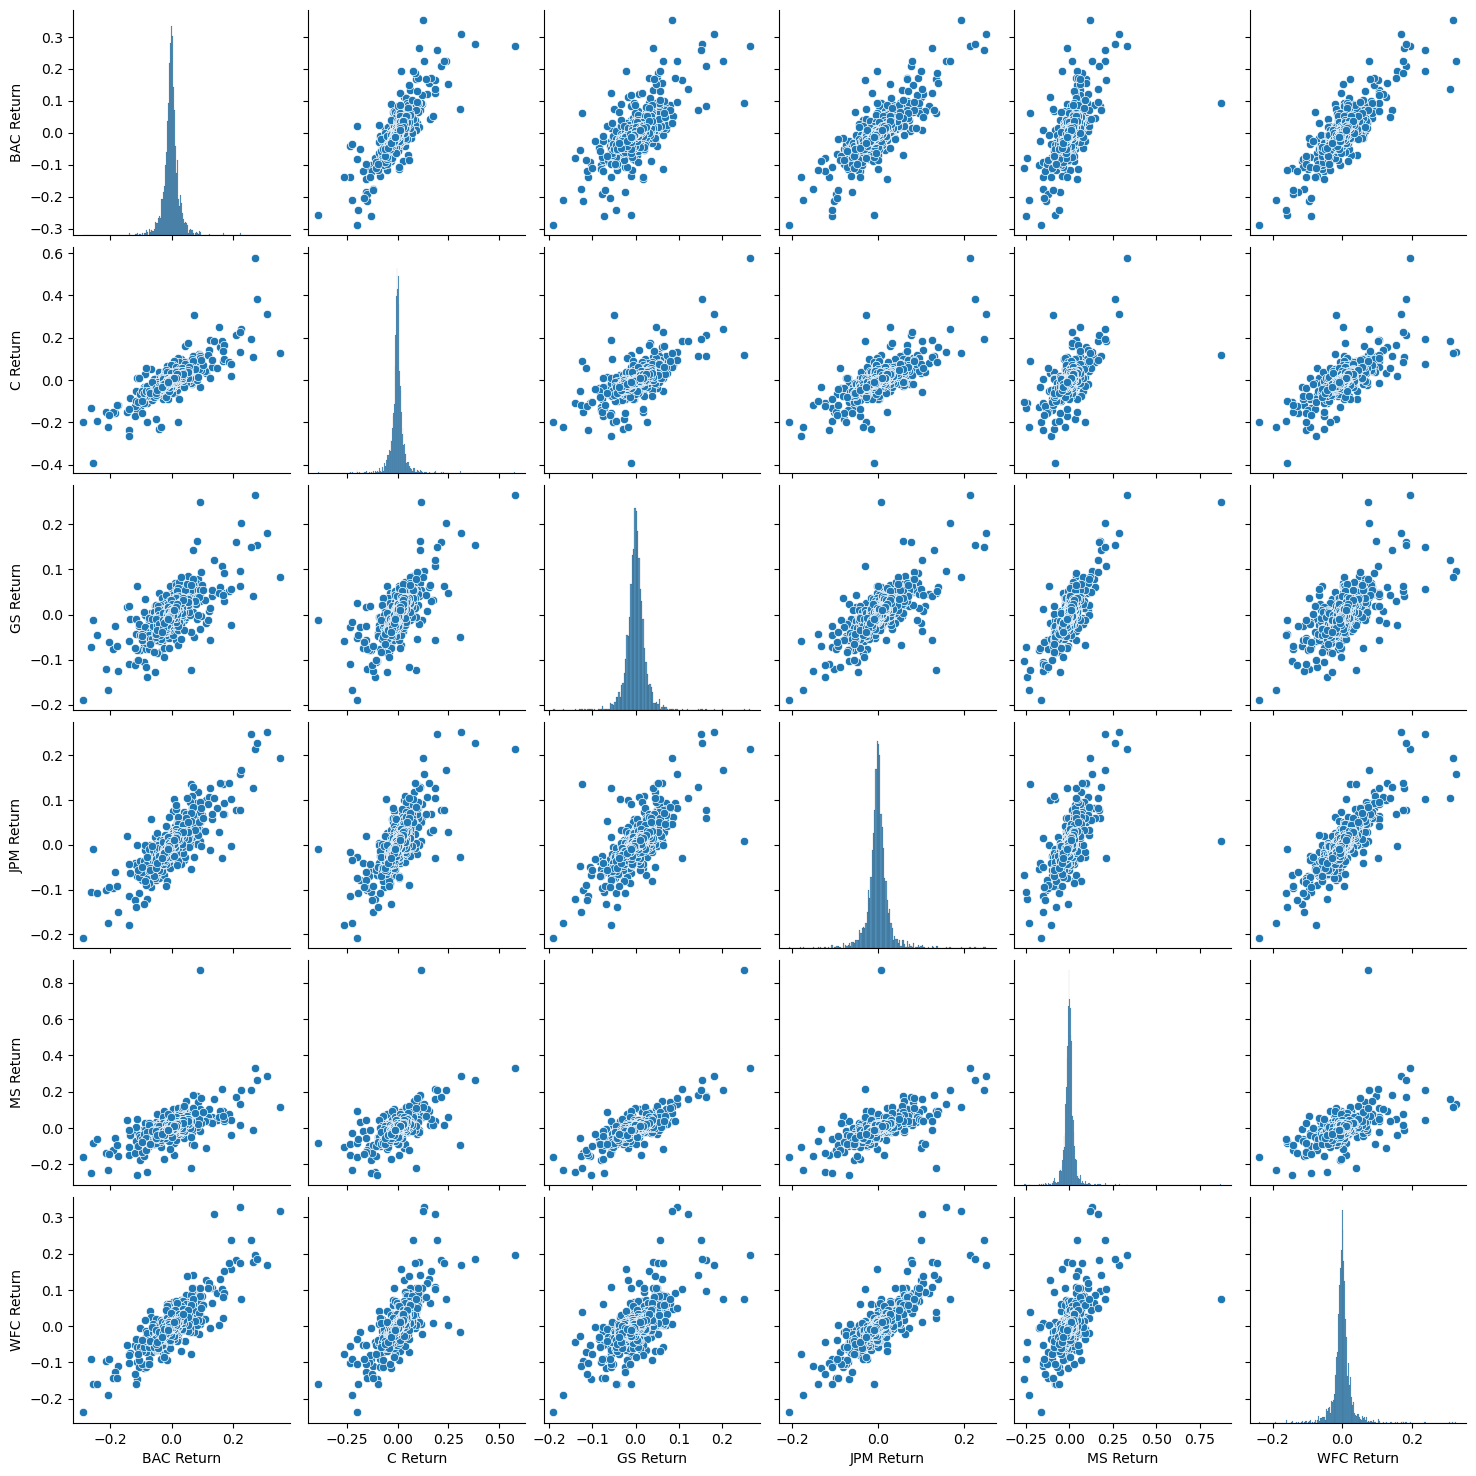

In [31]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

Background on [Citigroup's Stock Crash available here.](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29) 

You'll also see the enormous crash in value if you take a look a the stock price plot

** Using the returns DataFrame, I figured out on what dates each bank stock had the best and worst single day returns. 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [32]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anything significant happen in that time frame? **

[Citigroup had a stock split.](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=citigroup+stock+2011+may)

In [33]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [34]:
returns.std() # Citigroup riskiest

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [36]:
returns['2015-01-01':'2015-12-31'].std() # Very similar risk profiles, but Morgan Stanley or BofA

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** I created a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\Users\ookafor\AppData\Local\Temp\ipykernel_48292\680330184.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)


<Axes: xlabel='MS Return', ylabel='Density'>

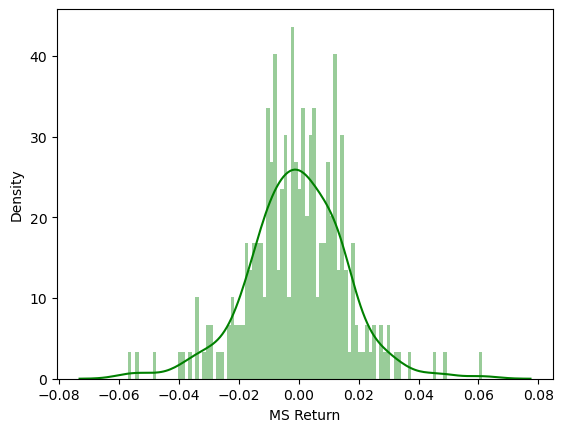

In [37]:
sns.distplot(returns['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

** I created a distplot using seaborn of the 2008 returns for CitiGroup **

C:\Users\ookafor\AppData\Local\Temp\ipykernel_48292\1146945100.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)


<Axes: xlabel='C Return', ylabel='Density'>

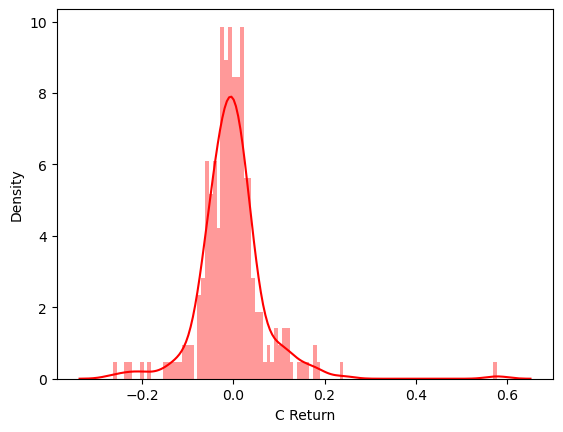

In [39]:
sns.distplot(returns['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

____
# More Visualizations

### Imports

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** I created a line plot showing Close price for each bank for the entire index of time.**

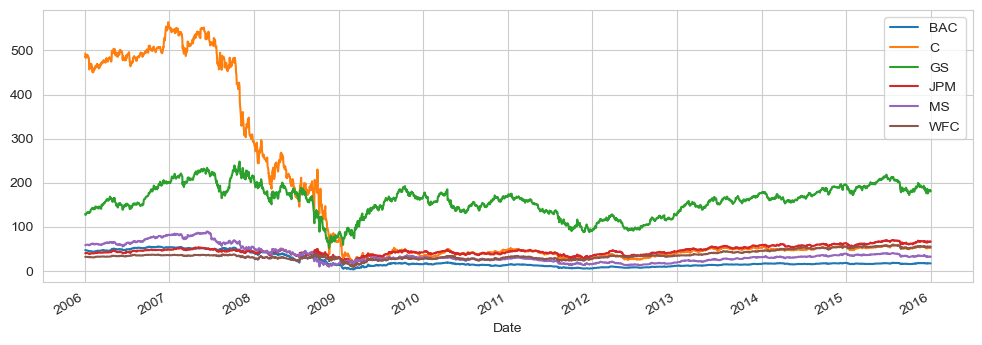

In [41]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

<Axes: xlabel='Date'>

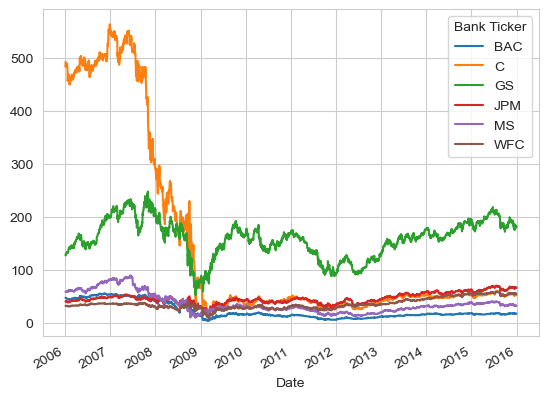

In [42]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [43]:
# plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

** I plotted the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

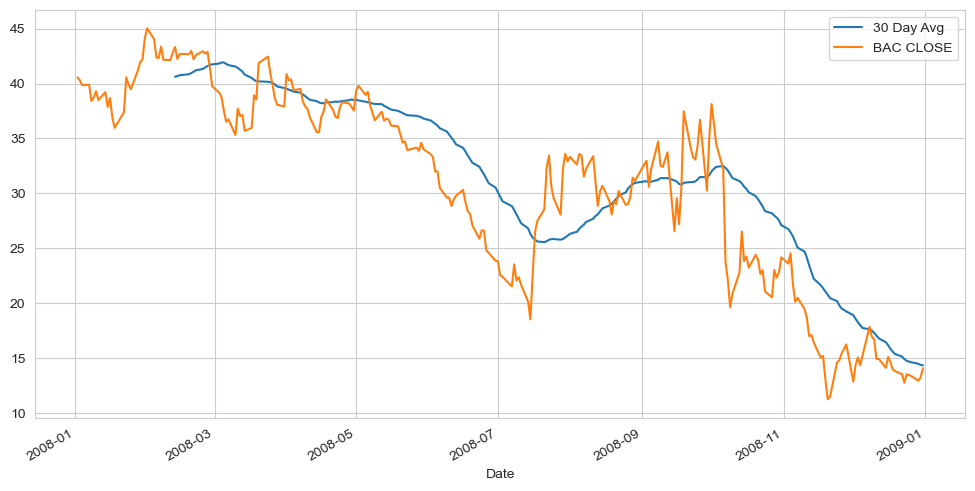

In [45]:
plt.figure(figsize=(12,6))
BAC['Close']['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close']['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

** I created a heatmap of the correlation between the stocks Close Price.**

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

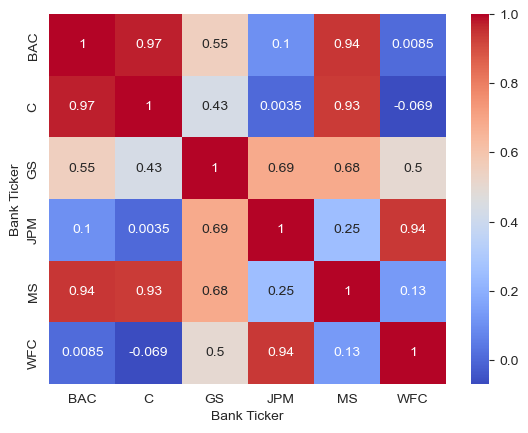

In [48]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),cmap='coolwarm',annot=True)

** I used seaborn's clustermap to cluster the correlations together:**

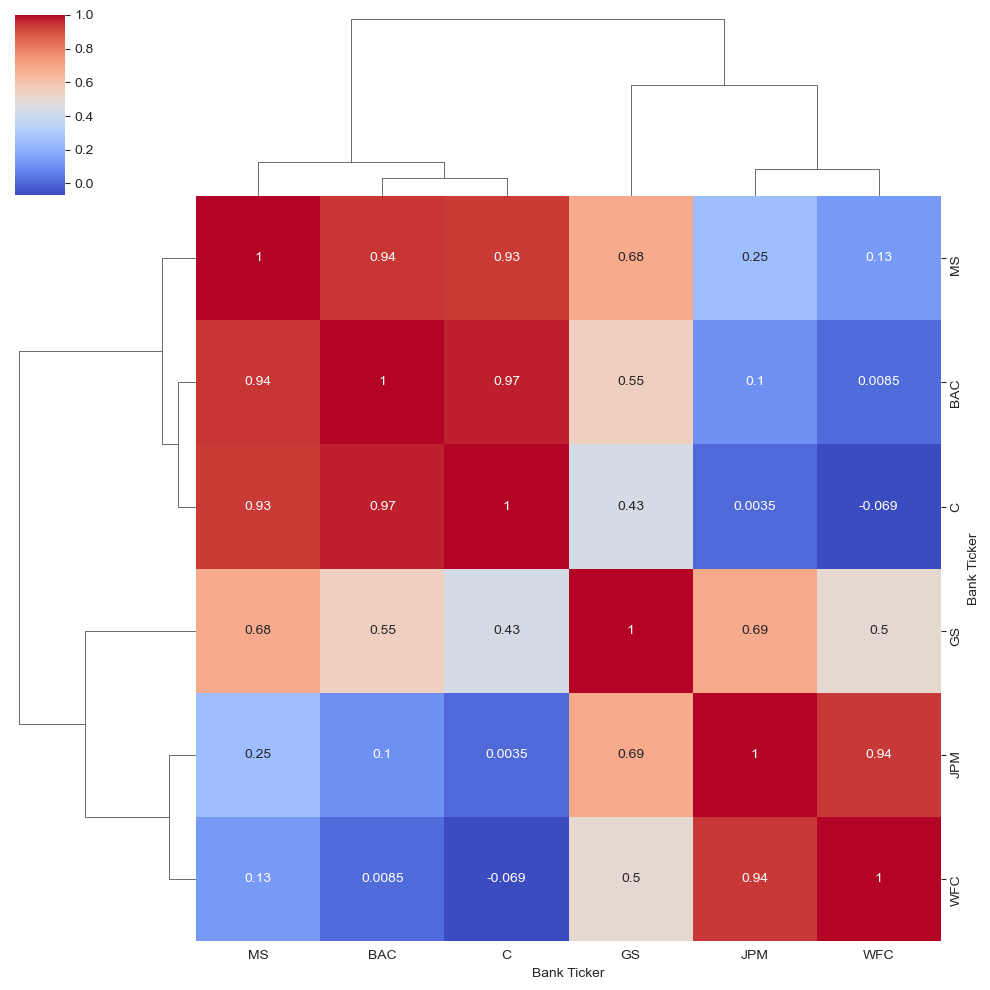

In [50]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),cmap='coolwarm',annot=True)

In [51]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

** I used .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [54]:
BAC[['Open', 'High', 'Low', 'Close']]['2015-01-01':'2016-01-01'].iplot(kind='candle')

** I used .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [55]:
MS['Close']['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

** I used .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [56]:
BAC['Close']['2015-01-01':'2016-01-01'].ta_plot(study='boll')

# The End